In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as sklm
from sklearn.preprocessing import label_binarize

%pylab inline

# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_PATH    = '/Users/reneoctavio/Documents/Paintings/vgg/'
DATASET_PATH  = '/Users/reneoctavio/Documents/Paintings/'

CAT_FILE      = DATASET_PATH  + 'categories.txt'
PREDICTIONS   = MODEL_PATH + 'prediction-top-5-test-100000.npy'
TRUE_VALUES   = MODEL_PATH + 'true-label-test-100000.npy'
PREDICTION_SC = MODEL_PATH + 'prediction-score-test-100000.npy'

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Read Species
sp_file = open(CAT_FILE, 'r')
dicCat = {}
listCat = []
for line in sp_file:
    ln = line.split()
    num = int(ln[len(ln) - 1])
    name = ' '.join(ln[0:(len(ln)-1)])
    dicCat[num] = name
for key, name in dicCat.items():
    listCat.append(name)
    
# Read True Values and Predictions
predictions = np.load(PREDICTIONS).astype(int)
true_values = np.load(TRUE_VALUES).astype(int)

In [3]:
print(sklm.precision_recall_fscore_support(true_values, predictions[:,0], average='weighted'))
print(sklm.accuracy_score(true_values, predictions[:,0]))
print(sklm.classification_report(true_values, predictions[:,0], target_names=listCat))

(0.56634522290843881, 0.56765903442440913, 0.56053706037900297, None)
0.567659034424
                              precision    recall  f1-score   support

        Art Nouveau (Modern)       0.58      0.53      0.55       986
          Post-Impressionism       0.51      0.40      0.45      1406
      Abstract Expressionism       0.43      0.53      0.47       486
               Impressionism       0.63      0.78      0.70      2797
               Magic Realism       0.77      0.31      0.45       242
                  Surrealism       0.52      0.56      0.54      1095
               Expressionism       0.44      0.46      0.45      1264
               Neoclassicism       0.75      0.63      0.68       615
        Color Field Painting       0.66      0.71      0.68       299
                Abstract Art       0.45      0.36      0.40       236
     Naive Art (Primitivism)       0.53      0.40      0.46       451
                      Cubism       0.57      0.55      0.56       393
    

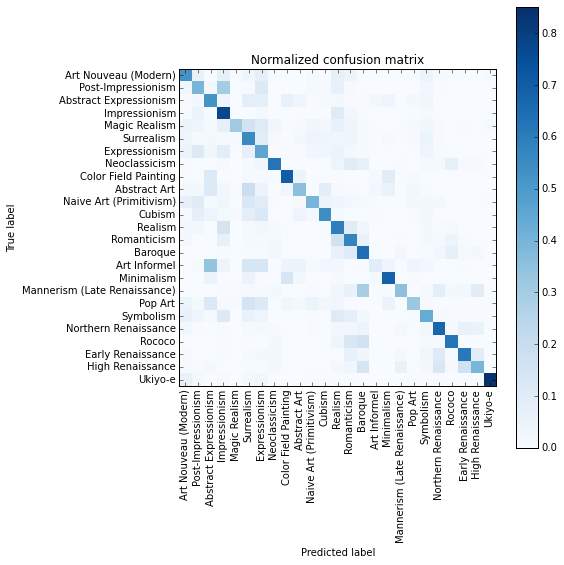

In [5]:
# Resize plots
pylab.rcParams['figure.figsize'] = (8.0, 8.0)

# Plot Conf Mat function
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='None', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(listCat))
    plt.xticks(tick_marks, listCat, rotation=90)
    plt.yticks(tick_marks, listCat)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Plot confusion matrix
cm = sklm.confusion_matrix(true_values, predictions[:,0], np.arange(len(listCat)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()